In [ ]:
  # importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder,OneHotEncoder

# Loading Data
dataset = pd.read_csv("/content/drive/MyDrive/SEM-6/ML/Data_Lab02/Data_for_Transformation.csv")
# print(f'My Data: \n{dataset}')

X = dataset.iloc[:,:-1].values
# print(X)
Y = dataset.iloc[:,-1:].values
# print(Y)
X_filtered = dataset.iloc[:,1:3].values
# print(X_filtered)

#Scaling of Data
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X_filtered)

#graph plotting
# plt.plot(X_scaled[:,:-1],X_scaled[:,-1:])
# plt.scatter(X_scaled[:,:-1],X_scaled[:,-1:])
plt.hist(X_scaled)
# print(X_scaled)


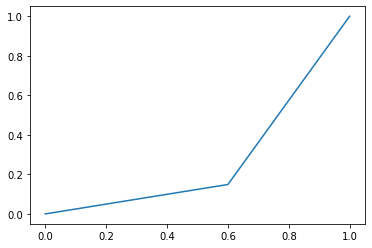

In [3]:
import matplotlib.pyplot as mlt
# mlt.plot([1,4,6],[3,10,50])
mlt.plot([0,0.6,1],[0,0.148936170212766,1])

In [ ]:

#Perform Standardaization on age and salary
StdScaler = StandardScaler()
X_std_scaler = StdScaler.fit_transform(X_filtered)
# print(X_std_scaler[:,-1:])
# print(X_std_scaler[:,:-1])
# print(X_std_scaler)

#graph plotting
# plt.plot(X_std_scaler[:,:-1],X_std_scaler[:,-1:])
# plt.scatter(X_std_scaler[:,:-1],X_std_scaler[:,-1:])
plt.hist(X_std_scaler)

In [ ]:
# categorical data
dataset = pd.read_csv("/content/drive/MyDrive/SEM-6/ML/Data_Lab02/Data_for_Categorical_Values.csv")

# print(dataset['Country'])
# print(dataset.values)
# print(dataset.describe())
# print(dataset.describe().values)

#seprating inputs and outputs
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1:].values
print(X)
#give label to string values
# here we have string feature for every row's 0th index
# replace it with label masking

LabelMasker = LabelEncoder()
X[:,0] = LabelMasker.fit_transform(X[:, 0])
print(X)

# get dummies
dummy = pd.get_dummies(dataset['Country'])
# print(dummy)
dataset = dataset.drop(['Country','Purchased'],axis=1)
# print(dataset)
dataset = pd.concat([dummy,dataset],axis=1)
# print(dataset)

In [ ]:
# categoical data
oneHot = OneHotEncoder()
dataset = pd.read_csv("/content/drive/MyDrive/SEM-6/ML/Data_Lab02/Data_for_Categorical_Values.csv")
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1:].values

# dummy = pd.get_dummies(dataset["Country"])
# # print(dummy)
# # print()
# dataset = dataset.drop(["Country","Purchased"],axis = 1)
# # print(dataset)
# dataset = pd.concat([dummy, dataset], axis = 1)
# print(dataset)

In [ ]:
# for missing values

# si = SimpleImputer()
dataset = pd.read_csv("/content/drive/MyDrive/SEM-6/ML/Data_Lab02/Data_for_Missing_Values.csv")
# print(dataset)
X = dataset.iloc[:,0:-1].values
Y = dataset.iloc[:,-1:].values
print(X)
# will drop column having all null values will not drop column if having one not null value
dataset.dropna(axis=0,how='all',inplace=True)
# print(dataset)
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Salary'] = dataset['Salary'].fillna(dataset['Salary'].mean())
print(dataset)
new_X = dataset.iloc[:,1:-1] # input
new_Y = dataset.iloc[:,-1:] # output
dummy = pd.get_dummies(dataset['Country'])
dataset = dataset.drop(['Country','Purchased'],axis = 1)
dataset = pd.concat([dummy,dataset],axis=1)
# print(dataset)

# now co-relation remaining

In [ ]:
# co-relation data filtering

import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/SEM-6/ML/Data_Lab02/Data_for_Correlation.csv")
# print(data)

X = data.iloc[:,:-1]
# print(X)
# print()
# co-relation matrix
corr = X.corr()
# print(corr)
sns.heatmap(corr)

# now remove columns having greater values than 0.9
columns = np.full((corr.shape[0]),True,dtype = bool)
for i in range(corr.shape[0]):
  for j in range(i+1,corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

# print(columns)

selected_columns = corr.columns[columns]
selected_columns.shape
# print(selected_columns)

data = data[selected_columns]
# print(data)
# this data is now clean and mostly not co-related
# corr2 = data.corr()
# print(corr2)
# columns2 = np.full((corr2.shape[0]),True,dtype=bool)
# for i in range(corr2.shape[0]):
#   for j in range(i+1,corr2.shape[0]):
#     if corr2.iloc[i,j] >= 0.9:
#       if columns2[j]:
#         columns2[j] = False

# ss = data.columns[columns2]
# ss.shape

# data2 = data[ss]
# print(data2)


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

if __name__ == '__main__':
    minmax = MinMaxScaler()
    exerciseData = pd.read_csv('/content/drive/MyDrive/SEM-6/ML/Data_Lab02/Exercise-CarData.csv')
    X1 = exerciseData.iloc[:,1:4]
    X2 = exerciseData.iloc[:,5:]
    Y = exerciseData.iloc[:,4:5]
    X = pd.concat([X1,X2],axis=1)
    data = pd.concat([Y,X],axis=1) # puted categorical data first
    # plt.hist(data["Doors"])
    # print(data.describe())
    # missing valaues...
    # print(data.info())
    data.dropna(axis=0,how='all',inplace=True)
    data['Age'] = data['Age'].fillna(data['Age'].mode()[0],axis=0)

    data['MetColor'] = data['MetColor'].fillna(data['MetColor'].mode()[0],axis=0)

    data['KM'] = data['KM'].apply(lambda x: float('nan') if not str.isnumeric(x) else float(x))

    data['Doors'] = data['Doors'].apply(lambda x: float('nan') if not str.isnumeric(x) else float(x))

    data['HP'] = data['HP'].apply(lambda x: float('nan') if not str.isnumeric(x) else float(x))

    # print(data.isnull().sum())

    data['KM'] = data['KM'].fillna(data['KM'].mean(),axis=0)

    data['Doors'] = data['Doors'].fillna(data['Doors'].mean(),axis=0)

    data['HP'] = data['HP'].fillna(data['HP'].mean(),axis=0)

    # print(data.isnull().sum())
    # print(data.info())
    # print(data)

    #Co-relationg fields

    X = data.iloc[:, 1:]
    corr = X.corr()
    # sns.heatmap(corr) 
    columns = np.full(corr.shape[0],True,dtype=bool)
    for i in range(corr.shape[0]):
      for j in range(i+1,corr.shape[0]):
        if(corr.iloc[i,j] >= 0.9) and columns[j]:
          columns[j] = False
    selected = corr.columns[columns]
    selected.shape
    data = data[selected]

    # scaling data
    std = StandardScaler()
    X = data.iloc[:, 1:]
    X = std.fit_transform(X)
    # print(X)
    # print(data)

    # masked categorical data: FuelType
    data = pd.concat([Y,data],axis=1)
    dummy = pd.get_dummies(data['FuelType'])
    data.drop(["FuelType"],axis=1)
    data = pd.concat([dummy,data],axis=1)
    # print(data)